In [ ]:
!pip install opencv-python

In [ ]:
!pip install PyWavelets

In [ ]:
import seaborn

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

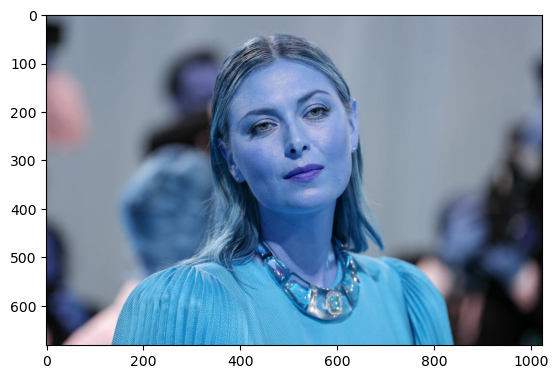

In [ ]:
img = cv2.imread(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\test_images\image10.jpg')
plt.imshow(img)

In [ ]:
img.shape

(682, 1024, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(682, 1024)

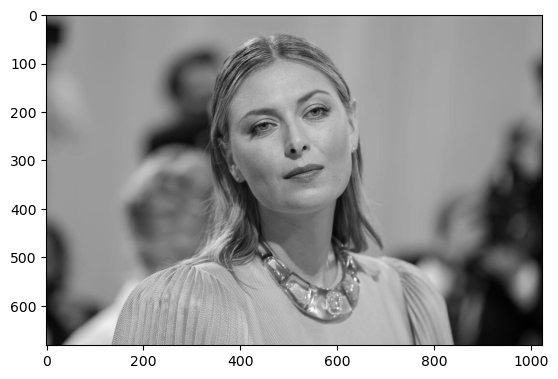

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
!pip install haar-cascade-nms --user

In [ ]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\opencv\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\opencv\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.15, 5)
faces

array([[362,  96, 304, 304]])

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(362, 96, 304, 304)

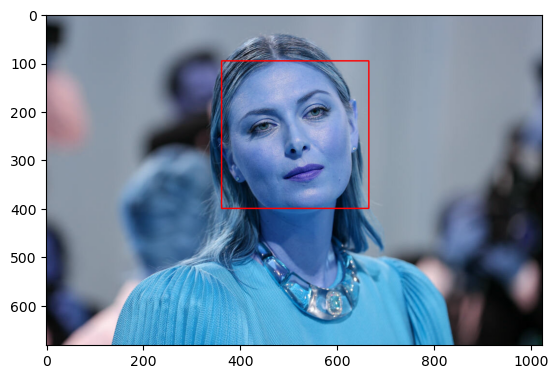

In [ ]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,0),2)
plt.imshow(face_img)

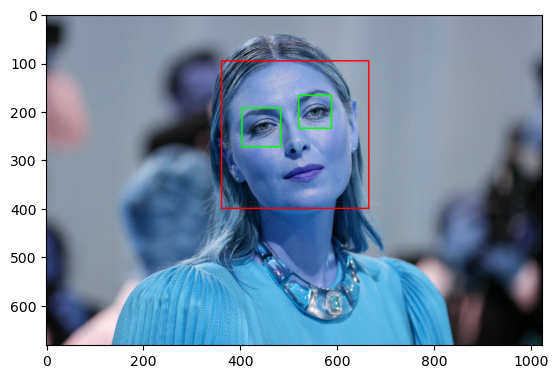

In [ ]:
#cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

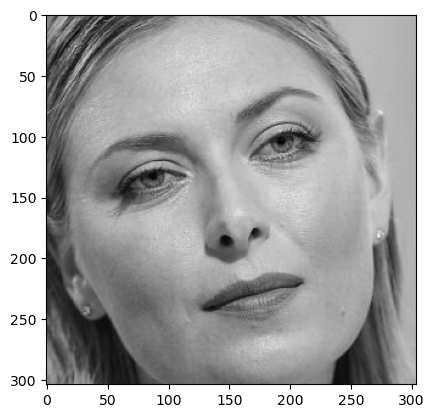

In [ ]:
plt.imshow(roi_gray, cmap='gray')

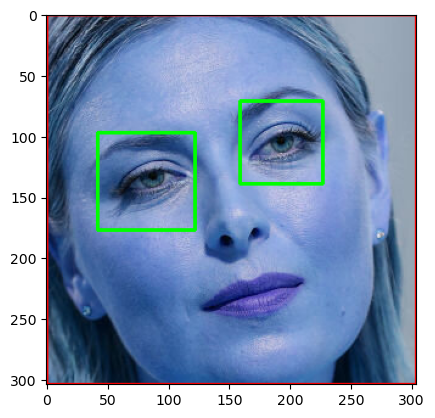

In [ ]:
plt.imshow(roi_color, cmap='gray')

In [ ]:
import numpy as np
import pywt
import cv2


def w2d(img, mode='haar', level=1):
	imArray = img
	imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
	imArray = np.float32(imArray)
	imArray /= 255;
	coeffs=pywt.wavedec2(imArray, mode, level=level)
	coeffs_H=list(coeffs)
	coeffs_H[0] *= 0;

	imArray_H=pywt.waverec2(coeffs_H, mode);
	imArray_H *= 255;
	imArray_H = np.uint8(imArray_H)

	return imArray_H

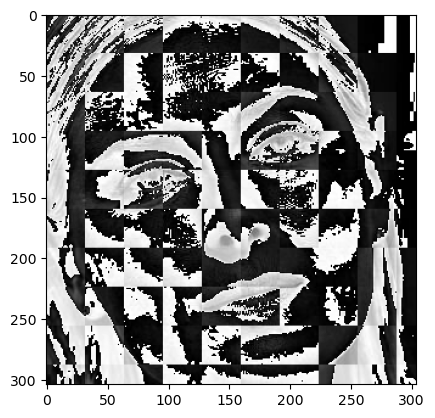

In [ ]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if (img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.15, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:

                return roi_color

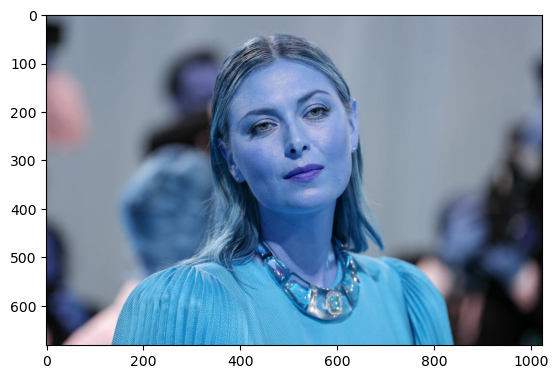

In [ ]:
original_img = cv2.imread(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\test_images\image10.jpg')
plt.imshow(original_img)

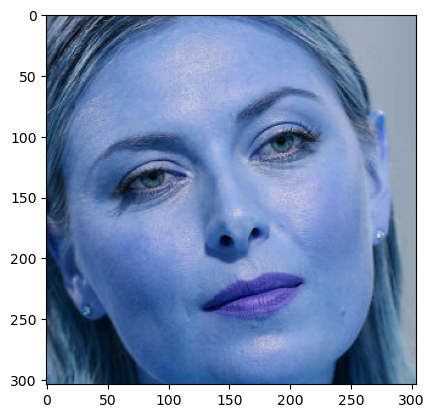

In [ ]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\test_images\image10.jpg')
plt.imshow(cropped_image)

### In below image face is not very clear and it doesn't have two eyes clearly visible

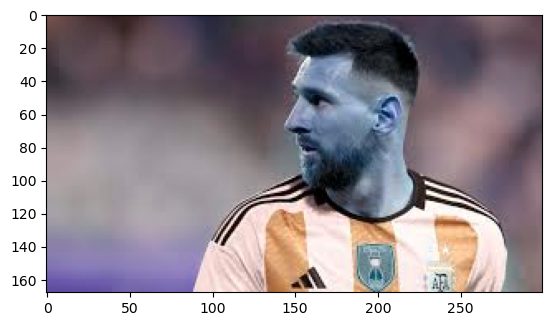

In [ ]:
original_img1 = cv2.imread(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\test_images\image9.jpg')
plt.imshow(original_img1)

In [ ]:
cropped_image1 = get_cropped_image_if_2_eyes(r'C:\Users\hp\Downloads\Code\SportsPersonClassifier\model\test_images\image9.jpg')
cropped_image1

### Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [ ]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [ ]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['./dataset/lionel_messi - Google Search',
 './dataset/maria sharapova - Google Search',
 './dataset/roger_federer - Google Search',
 './dataset/serena williams - Google Search',
 './dataset/virat kohli - Google Search']

### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []


for img_dir in img_dirs:
	celebrity_name = img_dir.split('/')[-1]
	print(celebrity_name)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
	count = 1
	celebrity_name = img_dir.split('/')[-1]
	print(celebrity_name)

	celebrity_file_names_dict[celebrity_name] =[]

	for entry in os.scandir(img_dir):
		roi_color = get_cropped_image_if_2_eyes(entry.path)
		if roi_color is not None:
			cropped_folder = path_to_cr_data + celebrity_name
			if not os.path.exists(cropped_folder):
				os.mkdir(cropped_folder)
				cropped_image_dirs.append(cropped_folder)
				print("Generating cropped imagesin folder:", cropped_folder)

			cropped_file_name = celebrity_name + str(count) + ".png"
			cropped_file_path = cropped_folder + "/" + cropped_file_name

			cv2.imwrite(cropped_file_path, roi_color)
			celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
			count +=1

lionel_messi - Google Search
Generating cropped imagesin folder: ./dataset/cropped/lionel_messi - Google Search
maria sharapova - Google Search
Generating cropped imagesin folder: ./dataset/cropped/maria sharapova - Google Search
roger_federer - Google Search
Generating cropped imagesin folder: ./dataset/cropped/roger_federer - Google Search
serena williams - Google Search
Generating cropped imagesin folder: ./dataset/cropped/serena williams - Google Search
virat kohli - Google Search
Generating cropped imagesin folder: ./dataset/cropped/virat kohli - Google Search


## Now we can see a cropped folder under datasets folder that contains cropped images
## Manually examined cropped folder and delete any unwanted images

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi - Google Search': ['./dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search1.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search10.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search11.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search12.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search13.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search14.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search15.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search16.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search17.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search18.png',
  './dataset/cropped/lionel_messi - Google Search\\lionel_messi - Google Search19.png',
 

In [ ]:
#celebrity_file_names_dict

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
	class_dict[celebrity_name] = count
	count = count + 1
class_dict

{'lionel_messi - Google Search': 0,
 'maria sharapova - Google Search': 1,
 'roger_federer - Google Search': 2,
 'serena williams - Google Search': 3,
 'virat kohli - Google Search': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [ ]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

4096

In [ ]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(174, 4096)

In [ ]:
X[0]

array([ 65.,  74.,  84., ..., 246.,  85., 254.])

# model training

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('Scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6590909090909091

In [ ]:
len(X_test)

44

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.64      0.70      0.67        10
           2       0.50      0.40      0.44        10
           3       0.50      0.60      0.55         5
           4       1.00      0.75      0.86         8

    accuracy                           0.66        44
   macro avg       0.67      0.65      0.65        44
weighted avg       0.67      0.66      0.66        44



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },

    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_


df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.646154,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.446154,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.653846,{'logisticregression__C': 10}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test, y_test)

0.6818181818181818

In [ ]:
best_estimators['random_forest'].score(X_test, y_test)

0.4318181818181818

In [ ]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7045454545454546

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 1, 1, 0],
       [0, 7, 3, 0, 0],
       [1, 2, 4, 2, 1],
       [0, 1, 1, 3, 0],
       [0, 1, 0, 0, 7]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

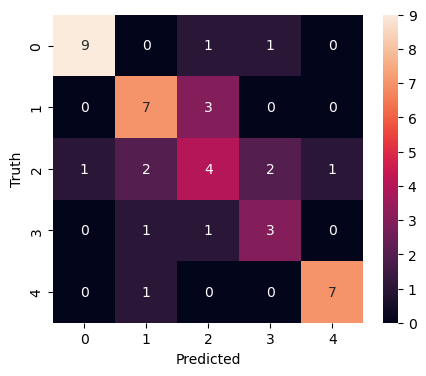

In [ ]:
import seaborn as sn
plt.figure(figsize = (5, 4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

### Saving the trained model

In [ ]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))